# Permutation Test

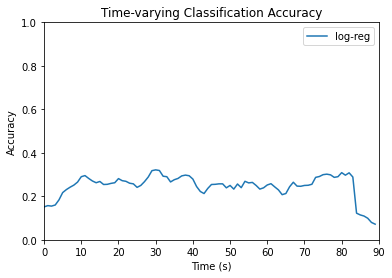

In [1]:
import sys
import numpy as np
import scipy as scp
import sklearn
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

sys.path.insert(0, 'C:/Users/Anna&Megan/Documents/GitHub/srp-lab-notebook/_build/jupyter_execute/hcp_data')

from hcp_logreg_indivtime import model, X_test, y_test, performAcc

In [2]:
# Shuffle each column of X_test to create permutation
def create_permutation(X):
    new_X = np.empty(X.shape)
    for i in range(X.shape[1]):
        randCol = X[:, i]
        np.random.shuffle(randCol)
        new_X[:, i] = randCol
    return new_X

In [3]:
# Find p value
def findP(t, arr):
    count = 0
    while count < len(arr) and arr[count] > t:
        count += 1
    p = count / len(arr)
    return p

In [4]:
# Take 200 resamples
acc = []
mean_acc = []
p_vals = []
startindex = 0
endindex = 0
for t in range(90):
    t_acc = []
    while endindex < y_test.shape[0] and int(y_test[endindex, 1]) == t:
        endindex += 1
    X_c = np.copy(X_test[startindex: endindex,])
    for i in range(200):
        new_X = create_permutation(X_c)
        a = model.score(new_X, y_test[startindex:endindex, 0])
        t_acc.append(a)
    startindex = endindex
    t_acc = np.array(t_acc)

    t_acc = sorted(t_acc, reverse = True)
    p = findP(performAcc[t], t_acc)
    p_vals.append(p)
    
    mean_acc.append(np.mean(t_acc))

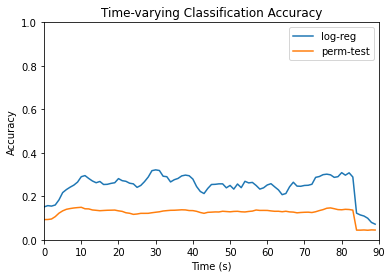

In [5]:
# Compare accuracies
xAx = [i for i in range(0,90)]
plt.plot(xAx, performAcc, label="log-reg")
plt.plot(xAx, mean_acc, label="perm-test")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Time-varying Logistic Regression Performance')

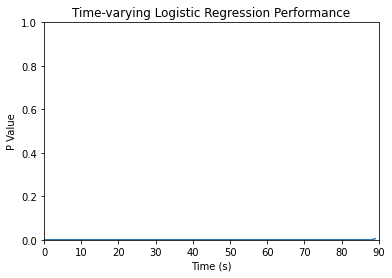

In [6]:
# Plot p-values
plt.plot(xAx, p_vals)
plt.xlabel("Time (s)")
plt.ylabel("P Value")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Logistic Regression Performance")